# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [12]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

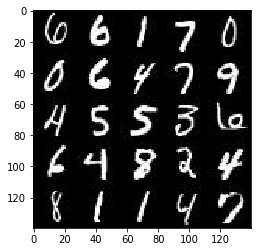

In [13]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

In [14]:
# looking into the values range
import numpy as np
print(np.min(mnist_images), np.max(mnist_images))

0.0 255.0


### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

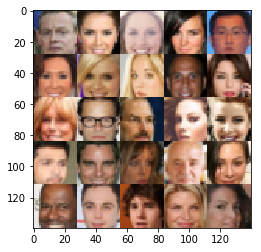

In [15]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
celeb_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(celeb_images, 'RGB'))

In [16]:
# looking into the values range
print(np.min(celeb_images), np.max(celeb_images))

0.0 255.0


In [17]:
# looking into the values range -- noting [-0.5, +0.5] range for batched images
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
i=0
for batch_images in mnist_dataset.get_batches(1):
    print(batch_images.min(), batch_images.max())
    i = i + 1
    if i> 10:
        break

-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5
-0.5 0.5


## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [19]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    # straightforward input from the assignment above 
    inputs_real = tf.placeholder(tf.float32, (None, image_width, 
                                 image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [20]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.15 # an alpha for a parametric relu
    
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # using 4 layers network
        # increasing depth by 2 an reducing height and width by 2 -- as in the class videos
        #
        # added dropouts twice following 
        # https://github.com/soumith/ganhacks
        
        # layers
        conv1 = tf.layers.conv2d(images, 64, 5, 2, 'same',
                                kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        relu1 = tf.maximum(alpha*conv1, conv1)
        relu1dp = tf.layers.dropout(relu1, rate=0.2)
        
        conv2 = tf.layers.conv2d(relu1dp, 128, 5, 2, 'same',
                                kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        conv2bn = tf.layers.batch_normalization(conv2, training=True)
        relu2 = tf.maximum(alpha*conv2bn, conv2bn)
        relu2dp = tf.layers.dropout(relu2, rate=0.2)
        
        conv3 = tf.layers.conv2d(relu2dp, 256, 5, 1, 'same',
                                kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        conv3bn = tf.layers.batch_normalization(conv3, training=True)
        relu3 = tf.maximum(alpha*conv3bn, conv3bn)
        relu3dp = tf.layers.dropout(relu3, rate=0.2)

        conv4 = tf.layers.conv2d(relu3dp, 512, 5, 1, 'same')
        conv4bn = tf.layers.batch_normalization(conv4, training=True)
        relu4 = tf.maximum(alpha*conv4bn, conv4bn)

        # flatten
        flat = tf.reshape(relu3, (-1, 4*4*512))
        
        # logits
        logits = tf.layers.dropout(tf.layers.dense(flat, 1), rate=0.3)

        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [21]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.1
    
    with tf.variable_scope('generator', reuse=(not is_train)):
        
        # Similar to the class' solution except of resizing the output at the end as in 
        # https://medium.com/@Miqubel/deep-learning-nd-face-generator-fa92ddbb8c4a
        # also rescaling by dividing in half -- making the output same as the real data 
        
        # layers
        fc1 = tf.layers.dense(z, 7 * 7 * 512)
        fc1 = tf.reshape(fc1, (-1, 7, 7, 512)) #standard conv stack
        fc1 = tf.layers.batch_normalization(fc1, training=is_train)
        fc1 = tf.maximum(alpha * fc1, fc1)
        
        dconv1 = tf.layers.conv2d_transpose(fc1, 256, 3, 2, 'same',
                                           kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        dconv1 = tf.layers.batch_normalization(dconv1, training=is_train)
        dconv1 = tf.maximum(alpha * dconv1, dconv1)
        
        dconv2 = tf.layers.conv2d_transpose(dconv1, 128, 3, 2, 'same',
                                           kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        dconv2 = tf.layers.batch_normalization(dconv2, training=is_train)
        dconv2 = tf.maximum(alpha * dconv2, dconv2)

        #dconv3 = tf.layers.conv2d_transpose(dconv2, 64, 2, 1, 'same')
        #dconv3 = tf.layers.batch_normalization(dconv3, training=is_train)
        #dconv3 = tf.maximum(alpha * dconv3, dconv3)

        # logits
        logits = tf.layers.conv2d_transpose(dconv2, out_channel_dim, 5, strides=2, padding='same',
                                           kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        logits = tf.image.resize_images(logits, (28, 28))

        # outs
        out = tf.tanh(logits) / 2 # make sure it's like images between -05 and 05
                
    return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [22]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    # gen model
    g_model = generator(input_z, out_channel_dim)
    
    # discr models
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    # losses
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
   
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [23]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # discriminator and generator variables
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [24]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [25]:
# the nice helper plotter utility from
# https://medium.com/@Miqubel/deep-learning-nd-face-generator-fa92ddbb8c4a
# a little adjusted for the screen
#
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,4)

def plot(loss_d, loss_g):
    fig, ax = plt.subplots()
    plt.plot(loss_d, label='Discriminator', alpha=0.5)
    plt.plot(loss_g, label='Generator', alpha=0.5)
    plt.title("Training Losses")
    plt.legend()

In [26]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    width = data_shape[1]
    height = data_shape[2]
    channel_dim = data_shape[3]
        
    input_real, input_z, lr = model_inputs(width, height, channel_dim, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channel_dim)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    loss_d, loss_g = [], []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                steps = steps + 1

                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    loss_d.append(train_loss_d)
                    loss_g.append(train_loss_g)

                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, channel_dim, data_image_mode)
                
            
        print("*************")
        show_generator_output(sess, 16, input_z, channel_dim, data_image_mode)
        plot(loss_d, loss_g)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.6020... Generator Loss: 0.3906
Epoch 1/2... Discriminator Loss: 2.2337... Generator Loss: 0.1863
Epoch 1/2... Discriminator Loss: 1.5093... Generator Loss: 0.4033
Epoch 1/2... Discriminator Loss: 1.6879... Generator Loss: 0.3348
Epoch 1/2... Discriminator Loss: 1.0309... Generator Loss: 0.7294
Epoch 1/2... Discriminator Loss: 1.4173... Generator Loss: 0.5329
Epoch 1/2... Discriminator Loss: 1.2687... Generator Loss: 0.6612
Epoch 1/2... Discriminator Loss: 1.3424... Generator Loss: 0.6064
Epoch 1/2... Discriminator Loss: 1.4080... Generator Loss: 0.5713
Epoch 1/2... Discriminator Loss: 1.3580... Generator Loss: 0.6344


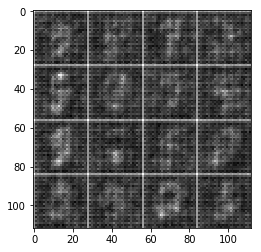

Epoch 1/2... Discriminator Loss: 1.2709... Generator Loss: 0.7026
Epoch 1/2... Discriminator Loss: 1.3591... Generator Loss: 0.6080
Epoch 1/2... Discriminator Loss: 1.2710... Generator Loss: 0.6487
Epoch 1/2... Discriminator Loss: 1.3011... Generator Loss: 0.7448
Epoch 1/2... Discriminator Loss: 1.3431... Generator Loss: 0.7449
Epoch 1/2... Discriminator Loss: 1.2763... Generator Loss: 0.7107
Epoch 1/2... Discriminator Loss: 1.2800... Generator Loss: 0.7174
Epoch 1/2... Discriminator Loss: 1.1919... Generator Loss: 0.7148
Epoch 1/2... Discriminator Loss: 1.2849... Generator Loss: 0.7510
Epoch 1/2... Discriminator Loss: 1.2240... Generator Loss: 0.6888


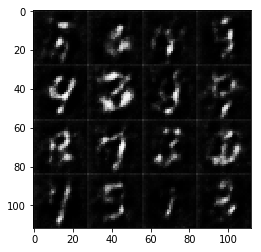

Epoch 1/2... Discriminator Loss: 1.2170... Generator Loss: 0.6705
Epoch 1/2... Discriminator Loss: 1.1799... Generator Loss: 0.7570
Epoch 1/2... Discriminator Loss: 1.1758... Generator Loss: 0.7775
Epoch 1/2... Discriminator Loss: 1.1138... Generator Loss: 0.7336
Epoch 1/2... Discriminator Loss: 1.2171... Generator Loss: 0.6617
Epoch 1/2... Discriminator Loss: 1.1177... Generator Loss: 0.9285
Epoch 1/2... Discriminator Loss: 0.9851... Generator Loss: 0.9764
Epoch 1/2... Discriminator Loss: 1.0972... Generator Loss: 0.9937
Epoch 1/2... Discriminator Loss: 1.0848... Generator Loss: 0.7559
Epoch 1/2... Discriminator Loss: 1.1069... Generator Loss: 0.8736


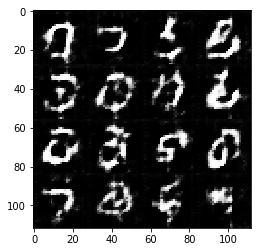

Epoch 1/2... Discriminator Loss: 1.0606... Generator Loss: 0.8187
Epoch 1/2... Discriminator Loss: 1.0700... Generator Loss: 0.8237
Epoch 1/2... Discriminator Loss: 1.1136... Generator Loss: 0.8705
Epoch 1/2... Discriminator Loss: 1.1587... Generator Loss: 0.5954
Epoch 1/2... Discriminator Loss: 1.1174... Generator Loss: 0.6660
Epoch 1/2... Discriminator Loss: 1.2014... Generator Loss: 0.8488
Epoch 1/2... Discriminator Loss: 1.3132... Generator Loss: 0.4751
Epoch 1/2... Discriminator Loss: 1.2940... Generator Loss: 0.4947
Epoch 1/2... Discriminator Loss: 1.1863... Generator Loss: 0.6495
Epoch 1/2... Discriminator Loss: 1.1909... Generator Loss: 0.7184


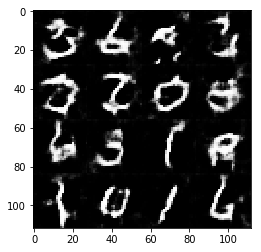

Epoch 1/2... Discriminator Loss: 1.2223... Generator Loss: 0.6424
Epoch 1/2... Discriminator Loss: 1.1932... Generator Loss: 1.0455
Epoch 1/2... Discriminator Loss: 1.1817... Generator Loss: 0.6110
Epoch 1/2... Discriminator Loss: 1.2190... Generator Loss: 0.7167
Epoch 1/2... Discriminator Loss: 1.2817... Generator Loss: 0.5584
Epoch 1/2... Discriminator Loss: 1.1335... Generator Loss: 0.6901
Epoch 1/2... Discriminator Loss: 1.1863... Generator Loss: 0.7207
Epoch 1/2... Discriminator Loss: 1.2417... Generator Loss: 0.5169
Epoch 1/2... Discriminator Loss: 1.2031... Generator Loss: 0.6743
Epoch 1/2... Discriminator Loss: 1.2876... Generator Loss: 0.5534


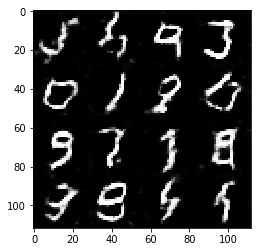

Epoch 1/2... Discriminator Loss: 1.1655... Generator Loss: 0.6916
Epoch 1/2... Discriminator Loss: 1.2677... Generator Loss: 0.5568
Epoch 1/2... Discriminator Loss: 1.2570... Generator Loss: 0.6591
Epoch 1/2... Discriminator Loss: 1.2367... Generator Loss: 0.8557
Epoch 1/2... Discriminator Loss: 1.1962... Generator Loss: 0.6768
Epoch 1/2... Discriminator Loss: 1.1496... Generator Loss: 0.6926
Epoch 1/2... Discriminator Loss: 1.0939... Generator Loss: 0.7901
Epoch 1/2... Discriminator Loss: 1.1820... Generator Loss: 0.7518
Epoch 1/2... Discriminator Loss: 1.1635... Generator Loss: 0.8947
Epoch 1/2... Discriminator Loss: 1.2024... Generator Loss: 0.7866


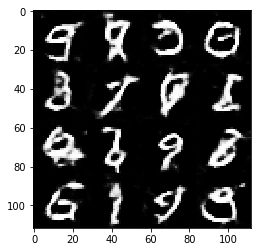

Epoch 1/2... Discriminator Loss: 1.2413... Generator Loss: 0.5972
Epoch 1/2... Discriminator Loss: 1.3828... Generator Loss: 0.8935
Epoch 1/2... Discriminator Loss: 1.2328... Generator Loss: 0.6289
Epoch 1/2... Discriminator Loss: 1.1693... Generator Loss: 0.5891
Epoch 1/2... Discriminator Loss: 1.0690... Generator Loss: 0.9123
Epoch 1/2... Discriminator Loss: 1.0914... Generator Loss: 0.8492
Epoch 1/2... Discriminator Loss: 1.2183... Generator Loss: 0.6486
Epoch 1/2... Discriminator Loss: 1.1378... Generator Loss: 0.7366
Epoch 1/2... Discriminator Loss: 1.2294... Generator Loss: 0.6247
Epoch 1/2... Discriminator Loss: 1.1424... Generator Loss: 0.7495


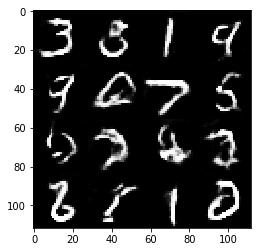

Epoch 1/2... Discriminator Loss: 1.1642... Generator Loss: 0.8344
Epoch 1/2... Discriminator Loss: 1.1908... Generator Loss: 0.6213
Epoch 1/2... Discriminator Loss: 1.2292... Generator Loss: 0.8771
Epoch 1/2... Discriminator Loss: 1.1126... Generator Loss: 0.7999
Epoch 1/2... Discriminator Loss: 1.1828... Generator Loss: 0.9772
Epoch 1/2... Discriminator Loss: 0.9829... Generator Loss: 0.8694
Epoch 1/2... Discriminator Loss: 1.1803... Generator Loss: 0.6957
Epoch 1/2... Discriminator Loss: 1.0821... Generator Loss: 0.9678
Epoch 1/2... Discriminator Loss: 0.9914... Generator Loss: 0.8795
Epoch 1/2... Discriminator Loss: 1.2108... Generator Loss: 0.8730


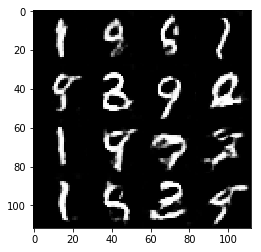

Epoch 1/2... Discriminator Loss: 1.2096... Generator Loss: 0.6283
Epoch 1/2... Discriminator Loss: 1.1161... Generator Loss: 0.6038
Epoch 1/2... Discriminator Loss: 1.0899... Generator Loss: 1.1671
Epoch 1/2... Discriminator Loss: 1.0251... Generator Loss: 0.9714
Epoch 1/2... Discriminator Loss: 1.0250... Generator Loss: 0.8771
Epoch 1/2... Discriminator Loss: 1.1347... Generator Loss: 0.8047
Epoch 1/2... Discriminator Loss: 1.1169... Generator Loss: 0.8491
Epoch 1/2... Discriminator Loss: 1.1875... Generator Loss: 1.0016
Epoch 1/2... Discriminator Loss: 1.2903... Generator Loss: 0.9447
Epoch 1/2... Discriminator Loss: 1.1325... Generator Loss: 0.8172


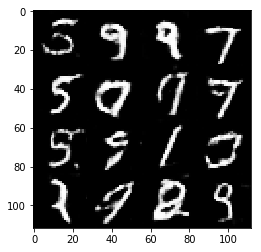

Epoch 1/2... Discriminator Loss: 1.1997... Generator Loss: 0.5867
Epoch 1/2... Discriminator Loss: 1.1634... Generator Loss: 0.8268
Epoch 1/2... Discriminator Loss: 1.5109... Generator Loss: 0.3402
Epoch 2/2... Discriminator Loss: 1.1466... Generator Loss: 0.6533
Epoch 2/2... Discriminator Loss: 1.1522... Generator Loss: 0.6249
Epoch 2/2... Discriminator Loss: 1.1331... Generator Loss: 0.6463
Epoch 2/2... Discriminator Loss: 1.0739... Generator Loss: 0.8443
Epoch 2/2... Discriminator Loss: 1.2052... Generator Loss: 0.7767
Epoch 2/2... Discriminator Loss: 1.1187... Generator Loss: 0.9625
Epoch 2/2... Discriminator Loss: 1.0606... Generator Loss: 0.8531


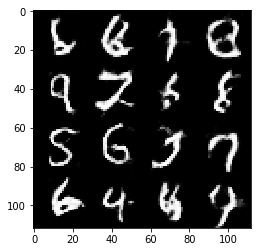

Epoch 2/2... Discriminator Loss: 1.2274... Generator Loss: 0.8070
Epoch 2/2... Discriminator Loss: 1.0463... Generator Loss: 1.0823
Epoch 2/2... Discriminator Loss: 1.1127... Generator Loss: 0.8019
Epoch 2/2... Discriminator Loss: 1.1286... Generator Loss: 1.0900
Epoch 2/2... Discriminator Loss: 1.2035... Generator Loss: 0.8903
Epoch 2/2... Discriminator Loss: 1.1143... Generator Loss: 0.8813
Epoch 2/2... Discriminator Loss: 1.2237... Generator Loss: 0.5167
Epoch 2/2... Discriminator Loss: 1.1905... Generator Loss: 1.2600
Epoch 2/2... Discriminator Loss: 1.2083... Generator Loss: 0.5884
Epoch 2/2... Discriminator Loss: 1.1114... Generator Loss: 1.0571


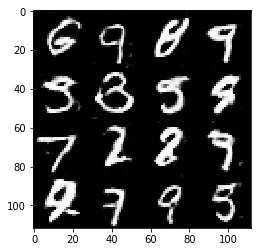

Epoch 2/2... Discriminator Loss: 1.1019... Generator Loss: 0.7354
Epoch 2/2... Discriminator Loss: 1.0898... Generator Loss: 0.8016
Epoch 2/2... Discriminator Loss: 1.0356... Generator Loss: 0.9581
Epoch 2/2... Discriminator Loss: 1.1925... Generator Loss: 0.6129
Epoch 2/2... Discriminator Loss: 1.0929... Generator Loss: 0.8024
Epoch 2/2... Discriminator Loss: 1.0721... Generator Loss: 0.7869
Epoch 2/2... Discriminator Loss: 1.3415... Generator Loss: 0.4096
Epoch 2/2... Discriminator Loss: 1.1675... Generator Loss: 0.7089
Epoch 2/2... Discriminator Loss: 1.2246... Generator Loss: 0.5217
Epoch 2/2... Discriminator Loss: 1.2505... Generator Loss: 0.4977


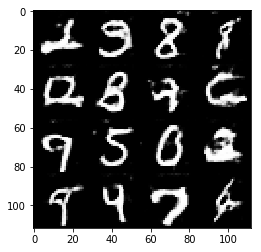

Epoch 2/2... Discriminator Loss: 1.1017... Generator Loss: 0.7360
Epoch 2/2... Discriminator Loss: 1.2766... Generator Loss: 0.9985
Epoch 2/2... Discriminator Loss: 1.1010... Generator Loss: 0.7402
Epoch 2/2... Discriminator Loss: 1.0645... Generator Loss: 0.7738
Epoch 2/2... Discriminator Loss: 1.1567... Generator Loss: 0.7334
Epoch 2/2... Discriminator Loss: 1.0576... Generator Loss: 0.9063
Epoch 2/2... Discriminator Loss: 1.1951... Generator Loss: 0.5794
Epoch 2/2... Discriminator Loss: 1.0429... Generator Loss: 0.8998
Epoch 2/2... Discriminator Loss: 1.0577... Generator Loss: 0.9376
Epoch 2/2... Discriminator Loss: 1.0954... Generator Loss: 0.7263


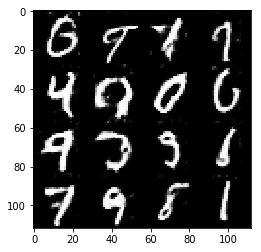

Epoch 2/2... Discriminator Loss: 1.2835... Generator Loss: 0.4818
Epoch 2/2... Discriminator Loss: 1.1808... Generator Loss: 0.9214
Epoch 2/2... Discriminator Loss: 1.1042... Generator Loss: 0.8399
Epoch 2/2... Discriminator Loss: 1.2298... Generator Loss: 0.5441
Epoch 2/2... Discriminator Loss: 1.0958... Generator Loss: 0.6404
Epoch 2/2... Discriminator Loss: 1.0312... Generator Loss: 0.8102
Epoch 2/2... Discriminator Loss: 1.2884... Generator Loss: 0.5001
Epoch 2/2... Discriminator Loss: 1.4119... Generator Loss: 0.3930
Epoch 2/2... Discriminator Loss: 1.0956... Generator Loss: 0.8184
Epoch 2/2... Discriminator Loss: 1.1752... Generator Loss: 0.6079


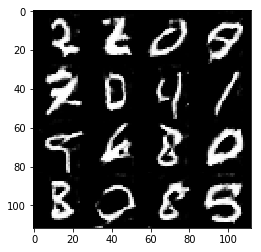

Epoch 2/2... Discriminator Loss: 1.1182... Generator Loss: 0.5954
Epoch 2/2... Discriminator Loss: 0.9153... Generator Loss: 0.9725
Epoch 2/2... Discriminator Loss: 0.9337... Generator Loss: 0.8263
Epoch 2/2... Discriminator Loss: 1.2188... Generator Loss: 0.6523
Epoch 2/2... Discriminator Loss: 1.0881... Generator Loss: 0.9348
Epoch 2/2... Discriminator Loss: 1.0869... Generator Loss: 0.7066
Epoch 2/2... Discriminator Loss: 1.0429... Generator Loss: 0.7514
Epoch 2/2... Discriminator Loss: 1.2845... Generator Loss: 0.4489
Epoch 2/2... Discriminator Loss: 1.0532... Generator Loss: 0.9943
Epoch 2/2... Discriminator Loss: 1.1085... Generator Loss: 0.6383


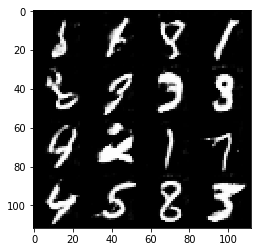

Epoch 2/2... Discriminator Loss: 1.5937... Generator Loss: 1.2403
Epoch 2/2... Discriminator Loss: 1.0943... Generator Loss: 0.9114
Epoch 2/2... Discriminator Loss: 1.0851... Generator Loss: 0.6629
Epoch 2/2... Discriminator Loss: 1.0220... Generator Loss: 0.8708
Epoch 2/2... Discriminator Loss: 1.0047... Generator Loss: 0.9586
Epoch 2/2... Discriminator Loss: 1.1684... Generator Loss: 0.6115
Epoch 2/2... Discriminator Loss: 1.1935... Generator Loss: 0.7897
Epoch 2/2... Discriminator Loss: 1.1617... Generator Loss: 1.2473
Epoch 2/2... Discriminator Loss: 1.0245... Generator Loss: 0.8941
Epoch 2/2... Discriminator Loss: 1.1327... Generator Loss: 0.6084


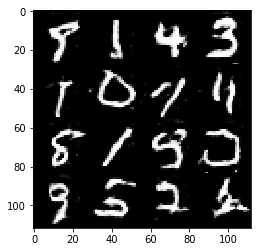

Epoch 2/2... Discriminator Loss: 1.0318... Generator Loss: 0.9582
Epoch 2/2... Discriminator Loss: 1.2003... Generator Loss: 0.6278
Epoch 2/2... Discriminator Loss: 1.0147... Generator Loss: 0.8022
Epoch 2/2... Discriminator Loss: 1.2807... Generator Loss: 0.5107
Epoch 2/2... Discriminator Loss: 1.0444... Generator Loss: 1.4303
Epoch 2/2... Discriminator Loss: 1.2161... Generator Loss: 0.7516
Epoch 2/2... Discriminator Loss: 1.0568... Generator Loss: 0.8746
Epoch 2/2... Discriminator Loss: 0.9551... Generator Loss: 0.7630
Epoch 2/2... Discriminator Loss: 1.1446... Generator Loss: 0.8611
Epoch 2/2... Discriminator Loss: 1.9337... Generator Loss: 0.3709


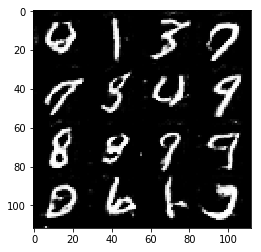

Epoch 2/2... Discriminator Loss: 1.2735... Generator Loss: 0.5326
Epoch 2/2... Discriminator Loss: 1.0433... Generator Loss: 0.7456
Epoch 2/2... Discriminator Loss: 1.1203... Generator Loss: 0.5899
Epoch 2/2... Discriminator Loss: 1.0532... Generator Loss: 0.9044
Epoch 2/2... Discriminator Loss: 1.1292... Generator Loss: 1.0501
Epoch 2/2... Discriminator Loss: 1.0119... Generator Loss: 0.8963
Epoch 2/2... Discriminator Loss: 1.0749... Generator Loss: 0.9217
Epoch 2/2... Discriminator Loss: 1.1670... Generator Loss: 0.6558
Epoch 2/2... Discriminator Loss: 1.0081... Generator Loss: 0.8402
Epoch 2/2... Discriminator Loss: 0.9466... Generator Loss: 0.8629


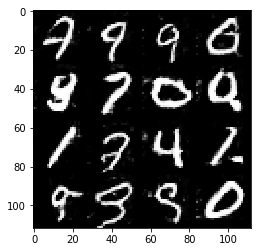

Epoch 2/2... Discriminator Loss: 0.9451... Generator Loss: 0.8513
Epoch 2/2... Discriminator Loss: 1.0368... Generator Loss: 0.8745
Epoch 2/2... Discriminator Loss: 1.0675... Generator Loss: 1.1019
Epoch 2/2... Discriminator Loss: 1.7899... Generator Loss: 0.9796
Epoch 2/2... Discriminator Loss: 1.0559... Generator Loss: 0.6290
Epoch 2/2... Discriminator Loss: 1.1466... Generator Loss: 0.7968
Epoch 2/2... Discriminator Loss: 1.0524... Generator Loss: 0.6939
*************


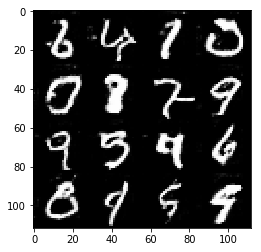

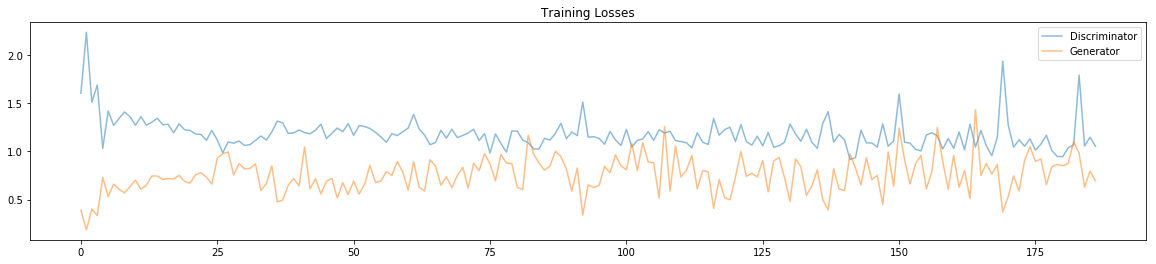

In [27]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.0071... Generator Loss: 0.2297
Epoch 1/1... Discriminator Loss: 1.1335... Generator Loss: 0.5446
Epoch 1/1... Discriminator Loss: 6.0014... Generator Loss: 0.0135
Epoch 1/1... Discriminator Loss: 2.7868... Generator Loss: 0.4574
Epoch 1/1... Discriminator Loss: 1.6803... Generator Loss: 0.4608
Epoch 1/1... Discriminator Loss: 1.5546... Generator Loss: 0.3571
Epoch 1/1... Discriminator Loss: 2.0218... Generator Loss: 0.5489
Epoch 1/1... Discriminator Loss: 1.3331... Generator Loss: 0.7217
Epoch 1/1... Discriminator Loss: 1.1966... Generator Loss: 0.7551
Epoch 1/1... Discriminator Loss: 1.6566... Generator Loss: 0.4545


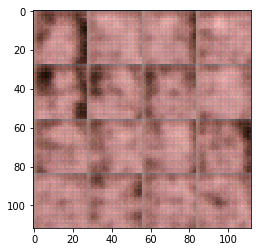

Epoch 1/1... Discriminator Loss: 1.3341... Generator Loss: 0.6151
Epoch 1/1... Discriminator Loss: 1.3051... Generator Loss: 0.6153
Epoch 1/1... Discriminator Loss: 1.2216... Generator Loss: 0.7763
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.9201
Epoch 1/1... Discriminator Loss: 1.2056... Generator Loss: 0.7637
Epoch 1/1... Discriminator Loss: 1.2632... Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 1.1871... Generator Loss: 0.7683
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 0.8021
Epoch 1/1... Discriminator Loss: 1.1760... Generator Loss: 0.7251
Epoch 1/1... Discriminator Loss: 1.3564... Generator Loss: 0.5462


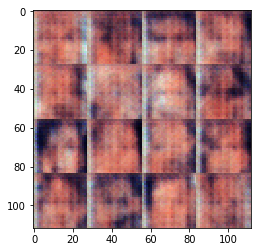

Epoch 1/1... Discriminator Loss: 1.5282... Generator Loss: 0.7289
Epoch 1/1... Discriminator Loss: 1.1904... Generator Loss: 0.7652
Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 0.4980
Epoch 1/1... Discriminator Loss: 1.2758... Generator Loss: 0.6025
Epoch 1/1... Discriminator Loss: 1.4900... Generator Loss: 0.4971
Epoch 1/1... Discriminator Loss: 1.2499... Generator Loss: 0.6458
Epoch 1/1... Discriminator Loss: 1.5079... Generator Loss: 0.5387
Epoch 1/1... Discriminator Loss: 1.4103... Generator Loss: 0.8292
Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.7509
Epoch 1/1... Discriminator Loss: 1.4268... Generator Loss: 0.5679


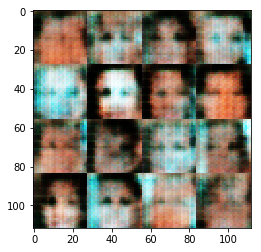

Epoch 1/1... Discriminator Loss: 1.5966... Generator Loss: 0.8622
Epoch 1/1... Discriminator Loss: 1.3363... Generator Loss: 0.5978
Epoch 1/1... Discriminator Loss: 1.3017... Generator Loss: 0.6589
Epoch 1/1... Discriminator Loss: 1.2912... Generator Loss: 0.6590
Epoch 1/1... Discriminator Loss: 1.5228... Generator Loss: 0.6515
Epoch 1/1... Discriminator Loss: 1.7697... Generator Loss: 0.9326
Epoch 1/1... Discriminator Loss: 1.2618... Generator Loss: 0.7641
Epoch 1/1... Discriminator Loss: 1.3542... Generator Loss: 0.7171
Epoch 1/1... Discriminator Loss: 1.3300... Generator Loss: 0.6906
Epoch 1/1... Discriminator Loss: 1.2911... Generator Loss: 0.6427


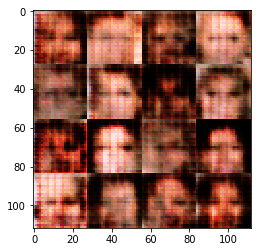

Epoch 1/1... Discriminator Loss: 1.4541... Generator Loss: 0.6118
Epoch 1/1... Discriminator Loss: 1.4692... Generator Loss: 0.6838
Epoch 1/1... Discriminator Loss: 1.4310... Generator Loss: 0.5164
Epoch 1/1... Discriminator Loss: 1.4020... Generator Loss: 0.6225
Epoch 1/1... Discriminator Loss: 1.4261... Generator Loss: 0.5622
Epoch 1/1... Discriminator Loss: 1.3516... Generator Loss: 0.6690
Epoch 1/1... Discriminator Loss: 1.3875... Generator Loss: 0.6082
Epoch 1/1... Discriminator Loss: 1.3945... Generator Loss: 0.6809
Epoch 1/1... Discriminator Loss: 1.3984... Generator Loss: 0.6983
Epoch 1/1... Discriminator Loss: 1.3327... Generator Loss: 0.6986


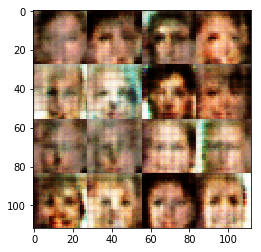

Epoch 1/1... Discriminator Loss: 1.4619... Generator Loss: 0.6665
Epoch 1/1... Discriminator Loss: 1.4053... Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 1.4443... Generator Loss: 0.6707
Epoch 1/1... Discriminator Loss: 1.4123... Generator Loss: 0.5666
Epoch 1/1... Discriminator Loss: 1.4572... Generator Loss: 0.5887
Epoch 1/1... Discriminator Loss: 1.3471... Generator Loss: 0.7235
Epoch 1/1... Discriminator Loss: 1.4267... Generator Loss: 0.6236
Epoch 1/1... Discriminator Loss: 1.3663... Generator Loss: 0.6271
Epoch 1/1... Discriminator Loss: 1.3999... Generator Loss: 0.6373
Epoch 1/1... Discriminator Loss: 1.3329... Generator Loss: 0.6705


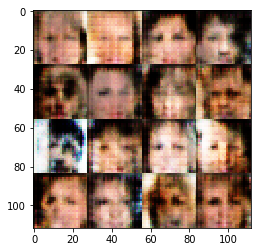

Epoch 1/1... Discriminator Loss: 1.3726... Generator Loss: 0.5918
Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.6978
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.6319
Epoch 1/1... Discriminator Loss: 1.3999... Generator Loss: 0.8038
Epoch 1/1... Discriminator Loss: 1.3806... Generator Loss: 0.7096
Epoch 1/1... Discriminator Loss: 1.3871... Generator Loss: 0.7295
Epoch 1/1... Discriminator Loss: 1.4579... Generator Loss: 0.5808
Epoch 1/1... Discriminator Loss: 1.4630... Generator Loss: 0.6048
Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 0.6424
Epoch 1/1... Discriminator Loss: 1.4204... Generator Loss: 0.6090


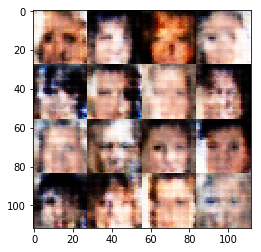

Epoch 1/1... Discriminator Loss: 1.4116... Generator Loss: 0.7748
Epoch 1/1... Discriminator Loss: 1.3920... Generator Loss: 0.8046
Epoch 1/1... Discriminator Loss: 1.4503... Generator Loss: 0.5134
Epoch 1/1... Discriminator Loss: 1.4958... Generator Loss: 0.4831
Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.5367
Epoch 1/1... Discriminator Loss: 1.3628... Generator Loss: 0.7280
Epoch 1/1... Discriminator Loss: 1.3869... Generator Loss: 0.7443
Epoch 1/1... Discriminator Loss: 1.4623... Generator Loss: 0.4656
Epoch 1/1... Discriminator Loss: 1.3398... Generator Loss: 0.6444
Epoch 1/1... Discriminator Loss: 1.4816... Generator Loss: 0.6528


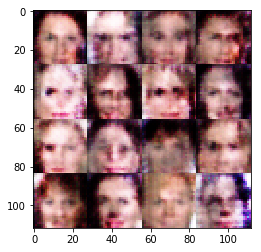

Epoch 1/1... Discriminator Loss: 1.4244... Generator Loss: 0.5919
Epoch 1/1... Discriminator Loss: 1.4393... Generator Loss: 0.7422
Epoch 1/1... Discriminator Loss: 1.3654... Generator Loss: 0.5367
Epoch 1/1... Discriminator Loss: 1.5193... Generator Loss: 0.5884
Epoch 1/1... Discriminator Loss: 1.2791... Generator Loss: 0.7705
Epoch 1/1... Discriminator Loss: 1.4499... Generator Loss: 0.4651
Epoch 1/1... Discriminator Loss: 1.3422... Generator Loss: 0.5668
Epoch 1/1... Discriminator Loss: 1.2956... Generator Loss: 0.6985
Epoch 1/1... Discriminator Loss: 1.4137... Generator Loss: 0.5300
Epoch 1/1... Discriminator Loss: 1.4038... Generator Loss: 0.5909


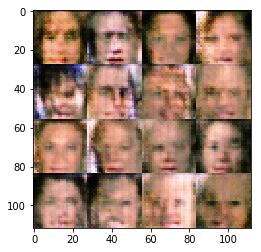

Epoch 1/1... Discriminator Loss: 1.3486... Generator Loss: 0.7238
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 0.5645
Epoch 1/1... Discriminator Loss: 1.4255... Generator Loss: 0.5727
Epoch 1/1... Discriminator Loss: 1.3953... Generator Loss: 0.7400
Epoch 1/1... Discriminator Loss: 1.4221... Generator Loss: 0.6394
Epoch 1/1... Discriminator Loss: 1.2854... Generator Loss: 0.7383
Epoch 1/1... Discriminator Loss: 1.4729... Generator Loss: 0.6563
Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.7225
Epoch 1/1... Discriminator Loss: 1.4307... Generator Loss: 0.6432
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.4797


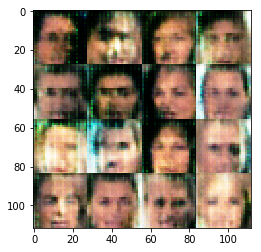

Epoch 1/1... Discriminator Loss: 1.4623... Generator Loss: 0.6396
Epoch 1/1... Discriminator Loss: 1.3471... Generator Loss: 0.6902
Epoch 1/1... Discriminator Loss: 1.4080... Generator Loss: 0.4720
Epoch 1/1... Discriminator Loss: 1.3858... Generator Loss: 0.5992
Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.9137
Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 0.6751
Epoch 1/1... Discriminator Loss: 1.5043... Generator Loss: 0.5907
Epoch 1/1... Discriminator Loss: 1.3651... Generator Loss: 0.5628
Epoch 1/1... Discriminator Loss: 1.3886... Generator Loss: 0.6563
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.7020


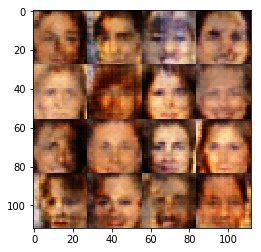

Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.6950
Epoch 1/1... Discriminator Loss: 1.4247... Generator Loss: 0.4896
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.5831
Epoch 1/1... Discriminator Loss: 1.3223... Generator Loss: 0.7757
Epoch 1/1... Discriminator Loss: 1.3630... Generator Loss: 0.6039
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 0.6752
Epoch 1/1... Discriminator Loss: 1.3849... Generator Loss: 0.8505
Epoch 1/1... Discriminator Loss: 1.2822... Generator Loss: 0.8134
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.6173
Epoch 1/1... Discriminator Loss: 1.3177... Generator Loss: 0.5993


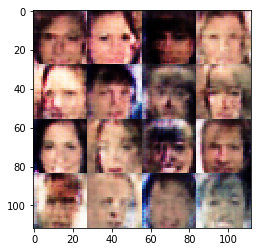

Epoch 1/1... Discriminator Loss: 1.3646... Generator Loss: 0.6823
Epoch 1/1... Discriminator Loss: 1.5920... Generator Loss: 0.8428
Epoch 1/1... Discriminator Loss: 1.3812... Generator Loss: 0.8166
Epoch 1/1... Discriminator Loss: 1.4679... Generator Loss: 0.7568
Epoch 1/1... Discriminator Loss: 1.3909... Generator Loss: 0.6503
Epoch 1/1... Discriminator Loss: 1.4302... Generator Loss: 0.6024
Epoch 1/1... Discriminator Loss: 1.3681... Generator Loss: 0.6907
Epoch 1/1... Discriminator Loss: 1.3206... Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.3513... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.6326


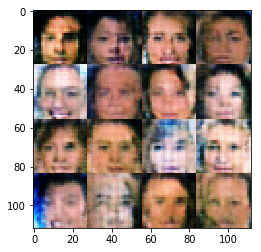

Epoch 1/1... Discriminator Loss: 1.3505... Generator Loss: 0.7257
Epoch 1/1... Discriminator Loss: 1.4213... Generator Loss: 0.6221
Epoch 1/1... Discriminator Loss: 1.3884... Generator Loss: 0.8167
Epoch 1/1... Discriminator Loss: 1.3124... Generator Loss: 0.6486
Epoch 1/1... Discriminator Loss: 1.3961... Generator Loss: 0.6827
Epoch 1/1... Discriminator Loss: 1.3341... Generator Loss: 0.5928
Epoch 1/1... Discriminator Loss: 1.4963... Generator Loss: 0.5198
Epoch 1/1... Discriminator Loss: 1.3335... Generator Loss: 0.7740
Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.7060
Epoch 1/1... Discriminator Loss: 1.3878... Generator Loss: 0.5771


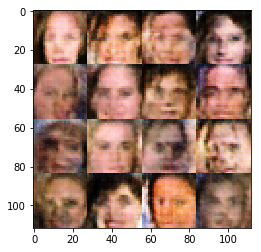

Epoch 1/1... Discriminator Loss: 1.3054... Generator Loss: 0.8211
Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.5846
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.7008
Epoch 1/1... Discriminator Loss: 1.3317... Generator Loss: 0.5361
Epoch 1/1... Discriminator Loss: 1.5085... Generator Loss: 0.4664
Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 1.4003... Generator Loss: 0.7137
Epoch 1/1... Discriminator Loss: 1.4220... Generator Loss: 0.6219
Epoch 1/1... Discriminator Loss: 1.3701... Generator Loss: 0.7250
Epoch 1/1... Discriminator Loss: 1.4671... Generator Loss: 0.5794


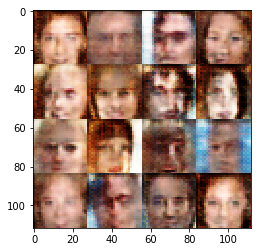

Epoch 1/1... Discriminator Loss: 1.4049... Generator Loss: 0.5448
Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.7034
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.7119
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 0.7841
Epoch 1/1... Discriminator Loss: 1.4416... Generator Loss: 0.4966
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.3787... Generator Loss: 0.6796
Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 0.6328
Epoch 1/1... Discriminator Loss: 1.3267... Generator Loss: 0.7185
Epoch 1/1... Discriminator Loss: 1.5561... Generator Loss: 0.6676


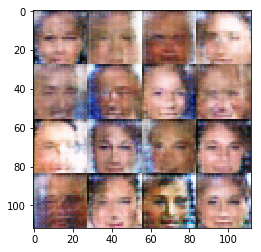

Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.6297
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.6851
Epoch 1/1... Discriminator Loss: 1.3117... Generator Loss: 0.6317
Epoch 1/1... Discriminator Loss: 1.3300... Generator Loss: 0.5902
Epoch 1/1... Discriminator Loss: 1.4231... Generator Loss: 0.8520
Epoch 1/1... Discriminator Loss: 1.3578... Generator Loss: 0.6129
Epoch 1/1... Discriminator Loss: 1.3687... Generator Loss: 0.6323
Epoch 1/1... Discriminator Loss: 1.3059... Generator Loss: 0.6308
Epoch 1/1... Discriminator Loss: 1.4147... Generator Loss: 0.5631
Epoch 1/1... Discriminator Loss: 1.3549... Generator Loss: 0.6537


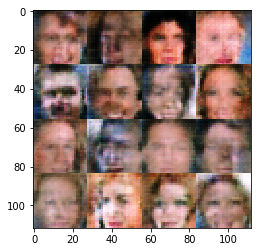

Epoch 1/1... Discriminator Loss: 1.3366... Generator Loss: 0.6184
Epoch 1/1... Discriminator Loss: 1.3597... Generator Loss: 0.6586
Epoch 1/1... Discriminator Loss: 1.3577... Generator Loss: 0.5948
Epoch 1/1... Discriminator Loss: 1.4831... Generator Loss: 0.5754
Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.7358
Epoch 1/1... Discriminator Loss: 1.4077... Generator Loss: 0.7016
Epoch 1/1... Discriminator Loss: 1.4645... Generator Loss: 0.5437
Epoch 1/1... Discriminator Loss: 1.4823... Generator Loss: 0.4633
Epoch 1/1... Discriminator Loss: 1.3899... Generator Loss: 0.5972
Epoch 1/1... Discriminator Loss: 1.3153... Generator Loss: 0.6868


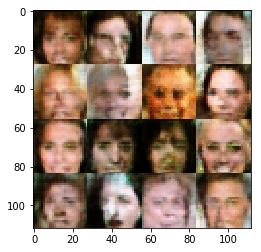

Epoch 1/1... Discriminator Loss: 1.3432... Generator Loss: 0.8012
Epoch 1/1... Discriminator Loss: 1.3607... Generator Loss: 0.6459
Epoch 1/1... Discriminator Loss: 1.4571... Generator Loss: 0.4518
Epoch 1/1... Discriminator Loss: 1.3155... Generator Loss: 0.6108
Epoch 1/1... Discriminator Loss: 1.3523... Generator Loss: 0.7183
Epoch 1/1... Discriminator Loss: 1.3421... Generator Loss: 0.6519
Epoch 1/1... Discriminator Loss: 1.3815... Generator Loss: 0.6990
Epoch 1/1... Discriminator Loss: 1.4806... Generator Loss: 0.4627
Epoch 1/1... Discriminator Loss: 1.3678... Generator Loss: 0.5922
Epoch 1/1... Discriminator Loss: 1.5051... Generator Loss: 0.4945


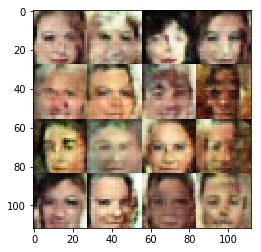

Epoch 1/1... Discriminator Loss: 1.4084... Generator Loss: 0.6491
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.5646
Epoch 1/1... Discriminator Loss: 1.4189... Generator Loss: 0.6522
Epoch 1/1... Discriminator Loss: 1.4291... Generator Loss: 0.7692
Epoch 1/1... Discriminator Loss: 1.5081... Generator Loss: 0.5032
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 1.4495... Generator Loss: 0.5786
Epoch 1/1... Discriminator Loss: 1.4340... Generator Loss: 0.6796
Epoch 1/1... Discriminator Loss: 1.3811... Generator Loss: 0.6778
Epoch 1/1... Discriminator Loss: 1.4084... Generator Loss: 0.6635


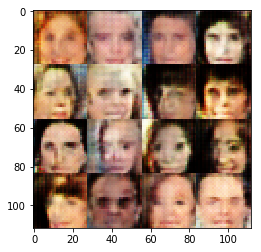

Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.6422
Epoch 1/1... Discriminator Loss: 1.3473... Generator Loss: 0.6847
Epoch 1/1... Discriminator Loss: 1.7918... Generator Loss: 0.6892
Epoch 1/1... Discriminator Loss: 1.3346... Generator Loss: 0.6991
Epoch 1/1... Discriminator Loss: 1.4686... Generator Loss: 0.5293
Epoch 1/1... Discriminator Loss: 1.4230... Generator Loss: 0.5843
Epoch 1/1... Discriminator Loss: 1.4581... Generator Loss: 0.5564
Epoch 1/1... Discriminator Loss: 1.3664... Generator Loss: 0.7472
Epoch 1/1... Discriminator Loss: 1.4568... Generator Loss: 0.6442
Epoch 1/1... Discriminator Loss: 1.4774... Generator Loss: 0.7175


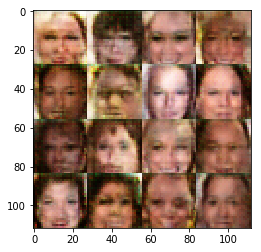

Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 0.6954
Epoch 1/1... Discriminator Loss: 1.4407... Generator Loss: 0.5597
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.7288
Epoch 1/1... Discriminator Loss: 1.5161... Generator Loss: 0.4495
Epoch 1/1... Discriminator Loss: 1.4079... Generator Loss: 0.6794
Epoch 1/1... Discriminator Loss: 1.4038... Generator Loss: 0.6541
Epoch 1/1... Discriminator Loss: 1.4245... Generator Loss: 0.5811
Epoch 1/1... Discriminator Loss: 1.4401... Generator Loss: 0.5376
Epoch 1/1... Discriminator Loss: 1.3903... Generator Loss: 0.6187
Epoch 1/1... Discriminator Loss: 1.4204... Generator Loss: 0.5842


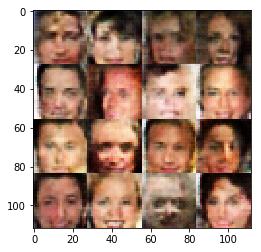

Epoch 1/1... Discriminator Loss: 1.4356... Generator Loss: 0.6949
Epoch 1/1... Discriminator Loss: 1.4023... Generator Loss: 0.6219
Epoch 1/1... Discriminator Loss: 1.4519... Generator Loss: 0.5770
Epoch 1/1... Discriminator Loss: 1.3341... Generator Loss: 0.6810
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.5952
Epoch 1/1... Discriminator Loss: 1.3404... Generator Loss: 0.5956
Epoch 1/1... Discriminator Loss: 1.4909... Generator Loss: 0.4614
Epoch 1/1... Discriminator Loss: 1.3420... Generator Loss: 0.7521
Epoch 1/1... Discriminator Loss: 1.4294... Generator Loss: 0.8165
Epoch 1/1... Discriminator Loss: 1.4907... Generator Loss: 0.6847


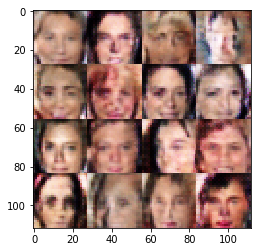

Epoch 1/1... Discriminator Loss: 1.3776... Generator Loss: 0.7289
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.6819
Epoch 1/1... Discriminator Loss: 1.4184... Generator Loss: 0.7583
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.7040
Epoch 1/1... Discriminator Loss: 1.3619... Generator Loss: 0.6166
Epoch 1/1... Discriminator Loss: 1.2809... Generator Loss: 0.6253
Epoch 1/1... Discriminator Loss: 1.3292... Generator Loss: 0.7154
Epoch 1/1... Discriminator Loss: 1.3780... Generator Loss: 0.6142
Epoch 1/1... Discriminator Loss: 1.5024... Generator Loss: 0.7574
Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 0.7897


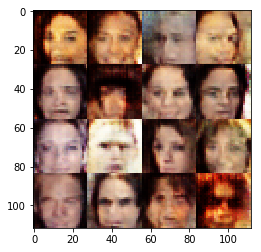

Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.6378
Epoch 1/1... Discriminator Loss: 1.4573... Generator Loss: 0.5962
Epoch 1/1... Discriminator Loss: 1.2840... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.4492... Generator Loss: 0.8062
Epoch 1/1... Discriminator Loss: 1.4455... Generator Loss: 0.6121
Epoch 1/1... Discriminator Loss: 1.3419... Generator Loss: 0.7191
Epoch 1/1... Discriminator Loss: 1.4184... Generator Loss: 0.6050
Epoch 1/1... Discriminator Loss: 1.3899... Generator Loss: 0.5476
Epoch 1/1... Discriminator Loss: 1.4065... Generator Loss: 0.5598
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.7299


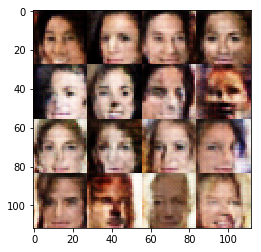

Epoch 1/1... Discriminator Loss: 1.4383... Generator Loss: 0.6264
Epoch 1/1... Discriminator Loss: 1.3452... Generator Loss: 0.6035
Epoch 1/1... Discriminator Loss: 1.3861... Generator Loss: 0.6881
Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.5456
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 0.7525
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.5733
Epoch 1/1... Discriminator Loss: 1.5394... Generator Loss: 0.5584
Epoch 1/1... Discriminator Loss: 1.3788... Generator Loss: 0.7220
Epoch 1/1... Discriminator Loss: 1.4579... Generator Loss: 0.5993
Epoch 1/1... Discriminator Loss: 1.2776... Generator Loss: 0.6956


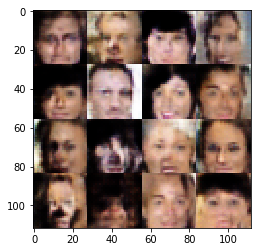

Epoch 1/1... Discriminator Loss: 1.5016... Generator Loss: 0.4451
Epoch 1/1... Discriminator Loss: 1.3718... Generator Loss: 0.6196
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.6847
Epoch 1/1... Discriminator Loss: 1.4443... Generator Loss: 0.5602
Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.5550
Epoch 1/1... Discriminator Loss: 1.3673... Generator Loss: 0.6285
Epoch 1/1... Discriminator Loss: 1.4269... Generator Loss: 0.5833
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.7426
Epoch 1/1... Discriminator Loss: 1.4226... Generator Loss: 0.5672
Epoch 1/1... Discriminator Loss: 1.4287... Generator Loss: 0.6906


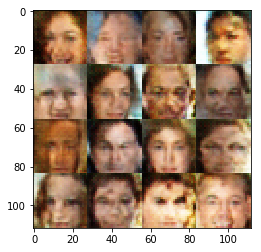

Epoch 1/1... Discriminator Loss: 1.4035... Generator Loss: 0.5475
Epoch 1/1... Discriminator Loss: 1.4194... Generator Loss: 0.5307
Epoch 1/1... Discriminator Loss: 1.3159... Generator Loss: 0.6185
Epoch 1/1... Discriminator Loss: 1.4847... Generator Loss: 0.6106
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.5785
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.7130
Epoch 1/1... Discriminator Loss: 1.3512... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.4237... Generator Loss: 0.5658
Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 0.6748
Epoch 1/1... Discriminator Loss: 1.4587... Generator Loss: 0.6775


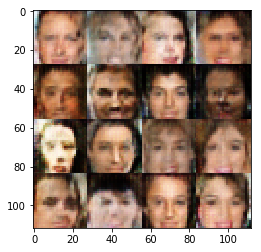

Epoch 1/1... Discriminator Loss: 1.4517... Generator Loss: 0.7312
Epoch 1/1... Discriminator Loss: 1.3870... Generator Loss: 0.7090
Epoch 1/1... Discriminator Loss: 1.4357... Generator Loss: 0.6041
Epoch 1/1... Discriminator Loss: 1.3988... Generator Loss: 0.5579
Epoch 1/1... Discriminator Loss: 1.4213... Generator Loss: 0.5630
Epoch 1/1... Discriminator Loss: 1.4484... Generator Loss: 0.6968
Epoch 1/1... Discriminator Loss: 1.4932... Generator Loss: 0.8690
Epoch 1/1... Discriminator Loss: 1.4421... Generator Loss: 0.4610
Epoch 1/1... Discriminator Loss: 1.3471... Generator Loss: 0.6940
Epoch 1/1... Discriminator Loss: 1.4094... Generator Loss: 0.7408


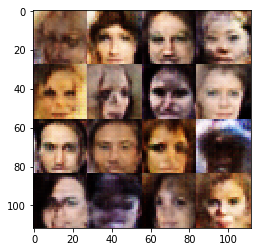

Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.6186
Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.6362
Epoch 1/1... Discriminator Loss: 1.3537... Generator Loss: 0.7449
Epoch 1/1... Discriminator Loss: 1.3806... Generator Loss: 0.6967
Epoch 1/1... Discriminator Loss: 1.3560... Generator Loss: 0.6147
Epoch 1/1... Discriminator Loss: 1.9321... Generator Loss: 0.8903
Epoch 1/1... Discriminator Loss: 1.3293... Generator Loss: 0.7959
Epoch 1/1... Discriminator Loss: 1.4314... Generator Loss: 0.5950
Epoch 1/1... Discriminator Loss: 1.4298... Generator Loss: 0.6696
Epoch 1/1... Discriminator Loss: 1.3823... Generator Loss: 0.5696


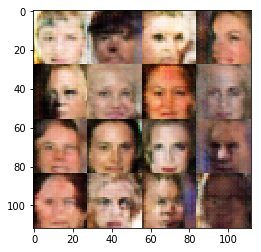

Epoch 1/1... Discriminator Loss: 1.4138... Generator Loss: 0.6006
Epoch 1/1... Discriminator Loss: 1.4347... Generator Loss: 0.5859
Epoch 1/1... Discriminator Loss: 1.2569... Generator Loss: 0.7502
Epoch 1/1... Discriminator Loss: 1.3650... Generator Loss: 0.6004
Epoch 1/1... Discriminator Loss: 1.3544... Generator Loss: 0.5694
Epoch 1/1... Discriminator Loss: 1.2957... Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.7995
Epoch 1/1... Discriminator Loss: 1.4999... Generator Loss: 0.5765
Epoch 1/1... Discriminator Loss: 1.3047... Generator Loss: 0.6636
Epoch 1/1... Discriminator Loss: 1.4480... Generator Loss: 0.5340


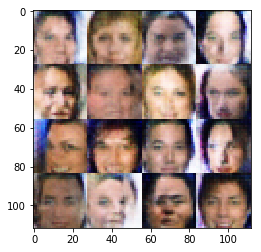

Epoch 1/1... Discriminator Loss: 1.5830... Generator Loss: 0.7550
Epoch 1/1... Discriminator Loss: 1.3070... Generator Loss: 0.6611
Epoch 1/1... Discriminator Loss: 1.5301... Generator Loss: 0.5114
Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.7222
Epoch 1/1... Discriminator Loss: 1.3600... Generator Loss: 0.6098
Epoch 1/1... Discriminator Loss: 1.3385... Generator Loss: 0.6351
Epoch 1/1... Discriminator Loss: 1.3563... Generator Loss: 0.7531
Epoch 1/1... Discriminator Loss: 1.3368... Generator Loss: 0.7079
Epoch 1/1... Discriminator Loss: 1.4565... Generator Loss: 0.4948
Epoch 1/1... Discriminator Loss: 1.5041... Generator Loss: 0.6684


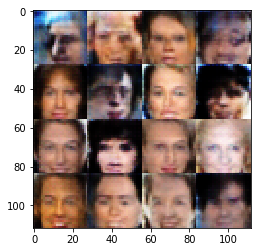

Epoch 1/1... Discriminator Loss: 1.3421... Generator Loss: 0.6310
Epoch 1/1... Discriminator Loss: 1.3426... Generator Loss: 0.6724
Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 0.6669
Epoch 1/1... Discriminator Loss: 1.4810... Generator Loss: 0.6073
Epoch 1/1... Discriminator Loss: 1.4214... Generator Loss: 0.6920
Epoch 1/1... Discriminator Loss: 1.3751... Generator Loss: 0.7450
Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.6988
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.7474
Epoch 1/1... Discriminator Loss: 1.3698... Generator Loss: 0.5829
Epoch 1/1... Discriminator Loss: 1.3061... Generator Loss: 0.6967


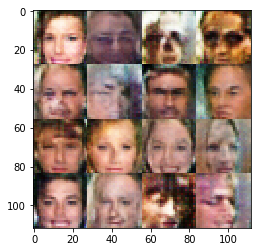

Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.7472
Epoch 1/1... Discriminator Loss: 1.3313... Generator Loss: 0.7125
Epoch 1/1... Discriminator Loss: 1.4093... Generator Loss: 0.5542
Epoch 1/1... Discriminator Loss: 1.3815... Generator Loss: 0.6402
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.6148
Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.6442
Epoch 1/1... Discriminator Loss: 1.4100... Generator Loss: 0.6353
Epoch 1/1... Discriminator Loss: 1.4719... Generator Loss: 0.5786
Epoch 1/1... Discriminator Loss: 1.4173... Generator Loss: 0.5364
Epoch 1/1... Discriminator Loss: 1.4384... Generator Loss: 0.6720


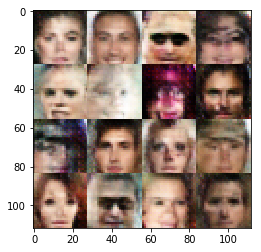

Epoch 1/1... Discriminator Loss: 1.5003... Generator Loss: 0.6875
Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.6600
Epoch 1/1... Discriminator Loss: 1.4253... Generator Loss: 0.6417
Epoch 1/1... Discriminator Loss: 1.3944... Generator Loss: 0.6557
Epoch 1/1... Discriminator Loss: 1.4146... Generator Loss: 0.5104
Epoch 1/1... Discriminator Loss: 1.3993... Generator Loss: 0.7431
Epoch 1/1... Discriminator Loss: 1.5420... Generator Loss: 0.4910
Epoch 1/1... Discriminator Loss: 1.4144... Generator Loss: 0.5900
Epoch 1/1... Discriminator Loss: 1.3521... Generator Loss: 0.6392
Epoch 1/1... Discriminator Loss: 1.5271... Generator Loss: 0.5712


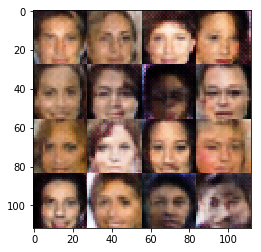

Epoch 1/1... Discriminator Loss: 1.3464... Generator Loss: 0.5985
Epoch 1/1... Discriminator Loss: 1.3252... Generator Loss: 0.6507
Epoch 1/1... Discriminator Loss: 1.4212... Generator Loss: 0.5325
Epoch 1/1... Discriminator Loss: 1.4847... Generator Loss: 0.5033
Epoch 1/1... Discriminator Loss: 1.4275... Generator Loss: 0.5540
Epoch 1/1... Discriminator Loss: 1.4147... Generator Loss: 0.7008
Epoch 1/1... Discriminator Loss: 1.4369... Generator Loss: 0.5596
Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.6257
Epoch 1/1... Discriminator Loss: 1.4106... Generator Loss: 0.7374
Epoch 1/1... Discriminator Loss: 1.4990... Generator Loss: 0.5628


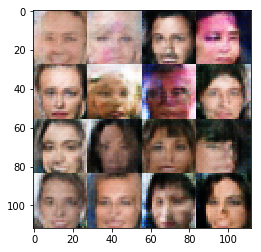

Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.5625
Epoch 1/1... Discriminator Loss: 1.2983... Generator Loss: 0.6067
Epoch 1/1... Discriminator Loss: 1.4303... Generator Loss: 0.5817
Epoch 1/1... Discriminator Loss: 1.3214... Generator Loss: 0.6791
Epoch 1/1... Discriminator Loss: 1.3859... Generator Loss: 0.6219
Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 0.7041
Epoch 1/1... Discriminator Loss: 1.4206... Generator Loss: 0.7487
Epoch 1/1... Discriminator Loss: 1.4250... Generator Loss: 0.6587
Epoch 1/1... Discriminator Loss: 1.4736... Generator Loss: 0.5723
Epoch 1/1... Discriminator Loss: 1.3001... Generator Loss: 0.7538


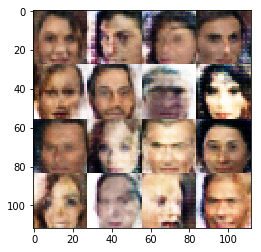

Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.5754
Epoch 1/1... Discriminator Loss: 1.3523... Generator Loss: 0.7575
Epoch 1/1... Discriminator Loss: 1.3466... Generator Loss: 0.6152
Epoch 1/1... Discriminator Loss: 1.4218... Generator Loss: 0.5753
Epoch 1/1... Discriminator Loss: 1.3486... Generator Loss: 0.6450
Epoch 1/1... Discriminator Loss: 1.4149... Generator Loss: 0.5455
Epoch 1/1... Discriminator Loss: 1.3259... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 1.3642... Generator Loss: 0.6114
Epoch 1/1... Discriminator Loss: 1.3599... Generator Loss: 0.7209
Epoch 1/1... Discriminator Loss: 1.4153... Generator Loss: 0.5625


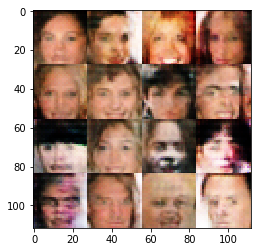

Epoch 1/1... Discriminator Loss: 1.3542... Generator Loss: 0.6534
Epoch 1/1... Discriminator Loss: 1.4016... Generator Loss: 0.6377
Epoch 1/1... Discriminator Loss: 1.4593... Generator Loss: 0.6238
Epoch 1/1... Discriminator Loss: 1.3799... Generator Loss: 0.6655
Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.7047
Epoch 1/1... Discriminator Loss: 1.4197... Generator Loss: 0.5486
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.6428
Epoch 1/1... Discriminator Loss: 1.3975... Generator Loss: 0.7622
Epoch 1/1... Discriminator Loss: 1.3873... Generator Loss: 0.6696
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 0.7557


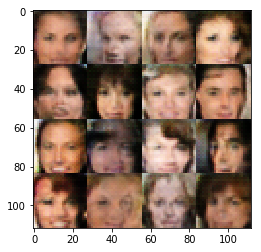

Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.5949
Epoch 1/1... Discriminator Loss: 1.4069... Generator Loss: 0.6687
Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.6502
Epoch 1/1... Discriminator Loss: 1.3790... Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.4390... Generator Loss: 0.5890
Epoch 1/1... Discriminator Loss: 1.3603... Generator Loss: 0.5954
Epoch 1/1... Discriminator Loss: 1.3209... Generator Loss: 0.7089
Epoch 1/1... Discriminator Loss: 1.3389... Generator Loss: 0.6863
Epoch 1/1... Discriminator Loss: 1.4196... Generator Loss: 0.6883
Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 0.6126


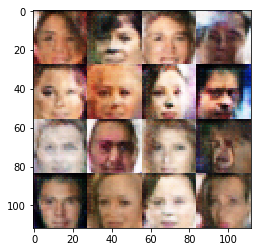

Epoch 1/1... Discriminator Loss: 1.4615... Generator Loss: 0.6540
Epoch 1/1... Discriminator Loss: 1.3396... Generator Loss: 0.6896
Epoch 1/1... Discriminator Loss: 1.4281... Generator Loss: 0.5612
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.5775
Epoch 1/1... Discriminator Loss: 1.4608... Generator Loss: 0.7075
Epoch 1/1... Discriminator Loss: 1.3873... Generator Loss: 0.6250
Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.7101
Epoch 1/1... Discriminator Loss: 1.4139... Generator Loss: 0.7034
Epoch 1/1... Discriminator Loss: 1.3719... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 0.7405


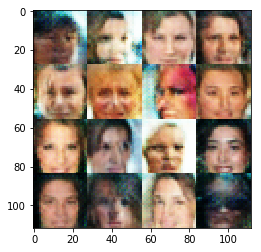

Epoch 1/1... Discriminator Loss: 1.4751... Generator Loss: 0.5062
Epoch 1/1... Discriminator Loss: 1.4161... Generator Loss: 0.6163
Epoch 1/1... Discriminator Loss: 1.3794... Generator Loss: 0.6833
Epoch 1/1... Discriminator Loss: 1.3088... Generator Loss: 0.6906
Epoch 1/1... Discriminator Loss: 1.4882... Generator Loss: 0.4973
Epoch 1/1... Discriminator Loss: 1.3538... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 1.4938... Generator Loss: 0.7188
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.6664
Epoch 1/1... Discriminator Loss: 1.3585... Generator Loss: 0.6279
Epoch 1/1... Discriminator Loss: 1.3798... Generator Loss: 0.5794


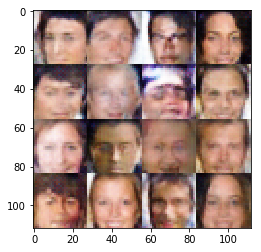

Epoch 1/1... Discriminator Loss: 1.3983... Generator Loss: 0.6602
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.6077
Epoch 1/1... Discriminator Loss: 1.3996... Generator Loss: 0.6414
Epoch 1/1... Discriminator Loss: 1.3822... Generator Loss: 0.6514
Epoch 1/1... Discriminator Loss: 1.4008... Generator Loss: 0.7355
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.6310
Epoch 1/1... Discriminator Loss: 1.3700... Generator Loss: 0.6471
Epoch 1/1... Discriminator Loss: 1.3439... Generator Loss: 0.6911
Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 0.5819


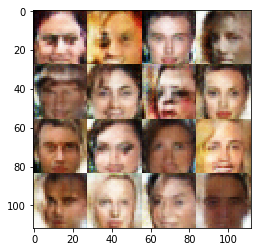

Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.8110
Epoch 1/1... Discriminator Loss: 1.4115... Generator Loss: 0.6848
Epoch 1/1... Discriminator Loss: 1.4308... Generator Loss: 0.5867
Epoch 1/1... Discriminator Loss: 1.4422... Generator Loss: 0.6160
Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.6778
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.6220
Epoch 1/1... Discriminator Loss: 1.3698... Generator Loss: 0.7108
Epoch 1/1... Discriminator Loss: 1.4956... Generator Loss: 0.6726
Epoch 1/1... Discriminator Loss: 1.4543... Generator Loss: 0.5467
Epoch 1/1... Discriminator Loss: 1.3575... Generator Loss: 0.5556


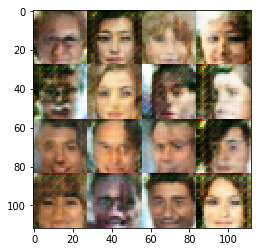

Epoch 1/1... Discriminator Loss: 1.4041... Generator Loss: 0.7037
Epoch 1/1... Discriminator Loss: 1.3655... Generator Loss: 0.6718
Epoch 1/1... Discriminator Loss: 1.4105... Generator Loss: 0.5830
Epoch 1/1... Discriminator Loss: 1.3125... Generator Loss: 0.7621
Epoch 1/1... Discriminator Loss: 1.3124... Generator Loss: 0.7373
Epoch 1/1... Discriminator Loss: 1.4757... Generator Loss: 0.5621
Epoch 1/1... Discriminator Loss: 1.3433... Generator Loss: 0.7189
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.6209
Epoch 1/1... Discriminator Loss: 1.4175... Generator Loss: 0.5965
Epoch 1/1... Discriminator Loss: 1.3963... Generator Loss: 0.7007


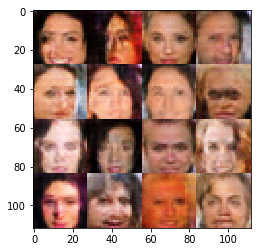

Epoch 1/1... Discriminator Loss: 1.3757... Generator Loss: 0.6384


In [ ]:
batch_size = 32
z_dim = 110
learning_rate = 0.0006
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.